<div style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی اصفهان - دانشکده مهندسی برق و کامپیوتر
            </font>
			<p></p>
			<font color=blue>
مبانی یادگیری ماشین
            </font>
			<br />
			<br />
پاییز ۱۴۰۱
		</div>
		<hr/>
		<font color=red size=6>
			<br />
			<div align=center>	
تکلیف کامپیوتری دوم
            </div>
		</font>
		<font color=green size=6>
			<br />
			<div align=center>	
علیرضا ابره فروش
            </div>
		</font>
		<font color=green size=6>
			<br />
			<div align=center>	
9816603
            </div>
		</font>
		<br />
		<hr />
		<style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>
	</font>
</div>

# 1

## 1-الف

In [284]:
import numpy as np
import pandas as pd
import datawig as dw
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

In [285]:
##### reading data
train_df = pd.read_csv('Q1_data/BigMart_Dataset_Trainset.csv')

##### cleaning data
#handling missing values and wrong values
train_df["Item_Weight"] = train_df["Item_Weight"].replace(np.NaN, train_df["Item_Weight"].mean())

train_df["Item_Fat_Content"] = train_df["Item_Fat_Content"].replace("LF", "Low Fat")
train_df["Item_Fat_Content"] = train_df["Item_Fat_Content"].replace("low fat", "Low Fat")
train_df["Item_Fat_Content"] = train_df["Item_Fat_Content"].replace("reg", "Regular")
train_df["Item_Fat_Content"] = train_df["Item_Fat_Content"].replace({"Low Fat" : 1, "Regular" : 2})

train_df["Outlet_Size"] = train_df["Outlet_Size"].replace({"Small" : 1, "Medium" : 2, "High" : 3 })
train_df["Outlet_Size"] = train_df["Outlet_Size"].replace(np.NaN, np.round(train_df["Outlet_Size"].mean()))

train_df = pd.get_dummies(train_df, columns = ["Item_Type", "Outlet_Identifier", "Outlet_Location_Type", "Outlet_Type"])

train_df.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,1,0.016047,249.8092,1999,2.0,3735.1380,0,0,...,0,0,1,1,0,0,0,1,0,0
1,DRC01,5.92,2,0.019278,48.2692,2009,2.0,443.4228,0,0,...,0,0,0,0,0,1,0,0,1,0
2,FDN15,17.50,1,0.016760,141.6180,1999,2.0,2097.2700,0,0,...,0,0,1,1,0,0,0,1,0,0
3,FDX07,19.20,2,0.000000,182.0950,1998,2.0,732.3800,0,0,...,0,0,0,0,0,1,1,0,0,0
4,NCD19,8.93,1,0.000000,53.8614,1987,3.0,994.7052,0,0,...,0,0,0,0,0,1,0,1,0,0


## 1-ب

In [286]:
correlation_matrix = train_df.corr()
print(correlation_matrix)

                                  Item_Weight  Item_Fat_Content  \
Item_Weight                      1.000000e+00         -0.021157   
Item_Fat_Content                -2.115731e-02          1.000000   
Item_Visibility                 -1.204853e-02          0.047314   
Item_MRP                         2.475610e-02          0.006063   
Outlet_Establishment_Year       -8.300836e-03          0.003151   
Outlet_Size                      7.224741e-03          0.000622   
Item_Outlet_Sales                1.155000e-02          0.018719   
Item_Type_Baking Goods          -3.259606e-02          0.083804   
Item_Type_Breads                -5.061184e-02          0.032643   
Item_Type_Breakfast             -1.958157e-03          0.065711   
Item_Type_Canned                -3.114182e-02          0.073235   
Item_Type_Dairy                  3.292259e-02          0.021236   
Item_Type_Frozen Foods           6.244951e-04          0.085041   
Item_Type_Fruits and Vegetables  2.953735e-02          0.11695

## 1-ج

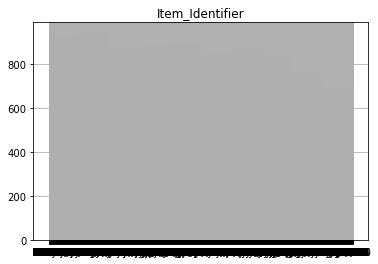

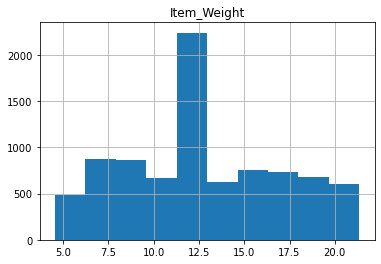

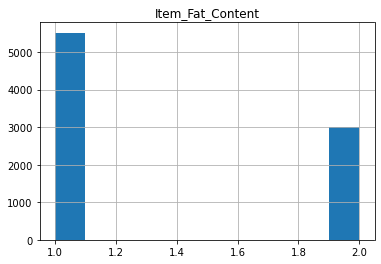

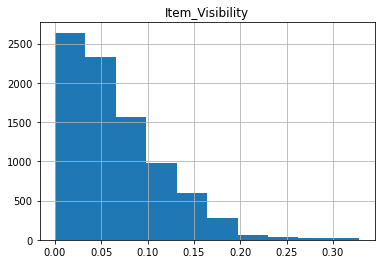

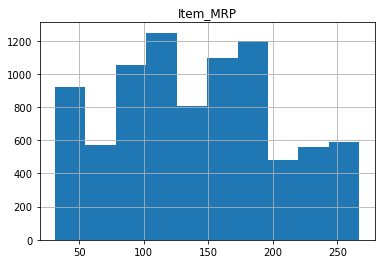

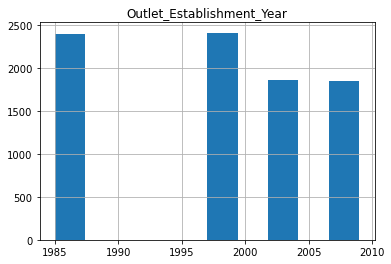

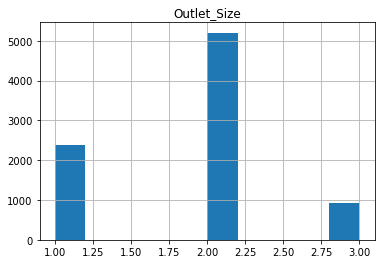

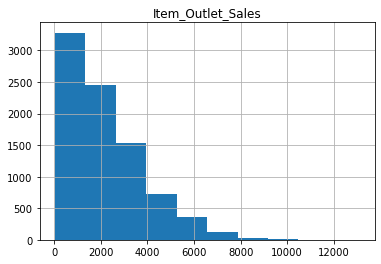

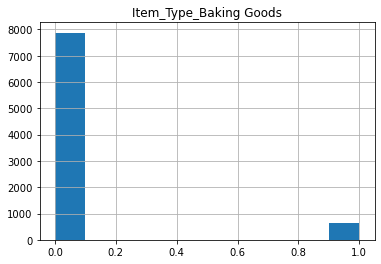

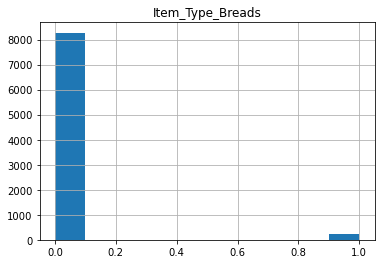

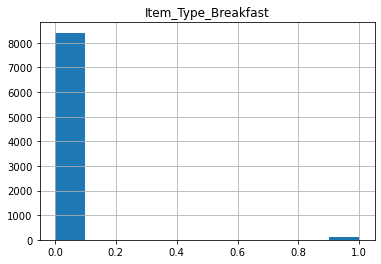

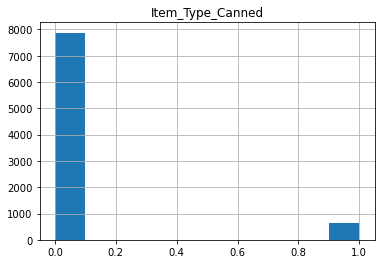

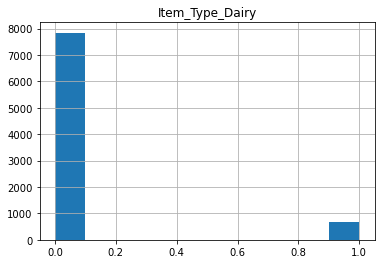

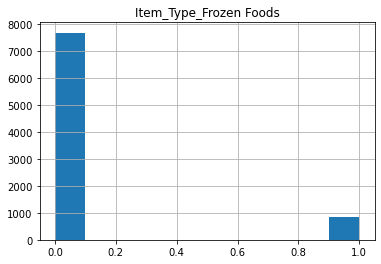

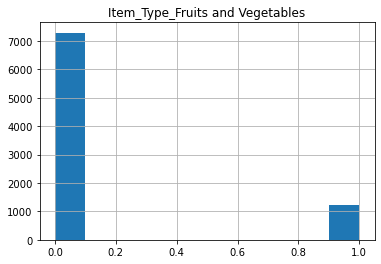

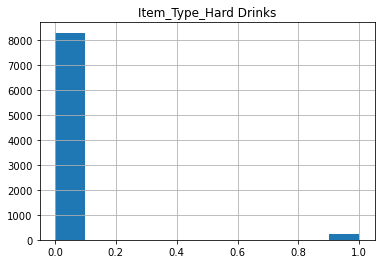

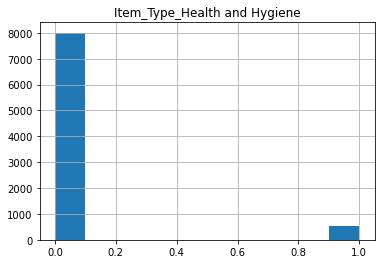

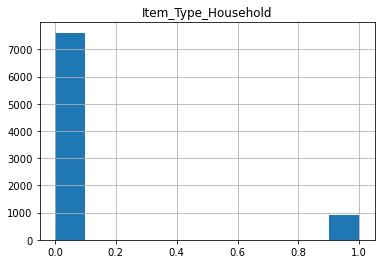

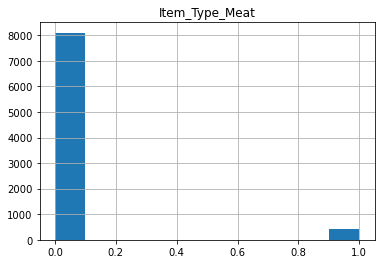

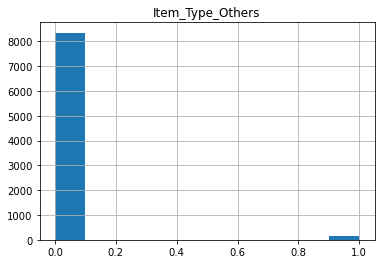

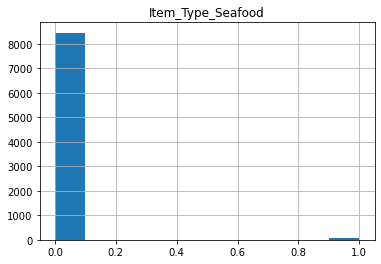

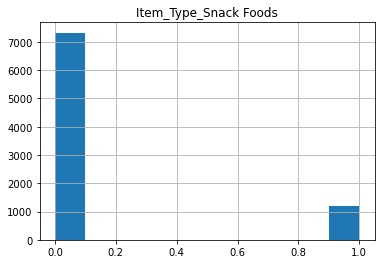

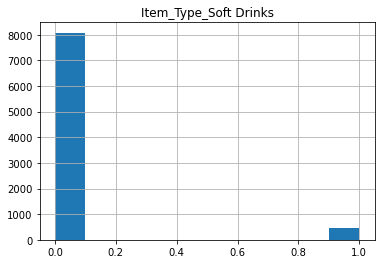

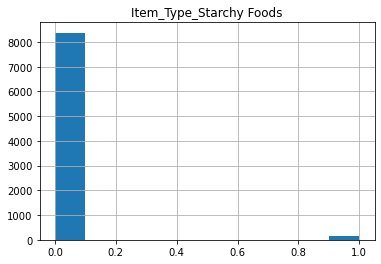

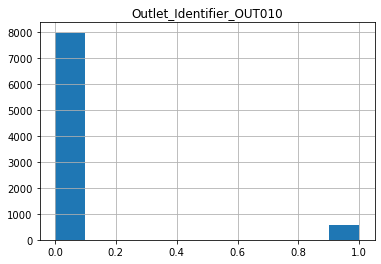

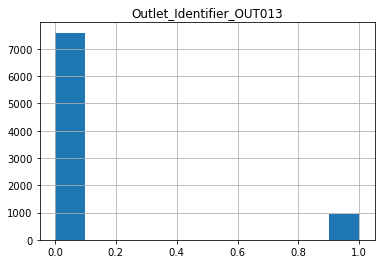

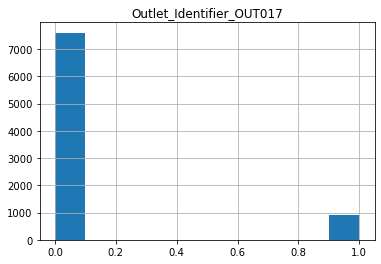

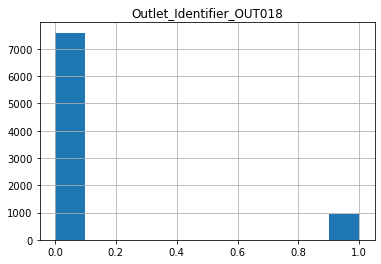

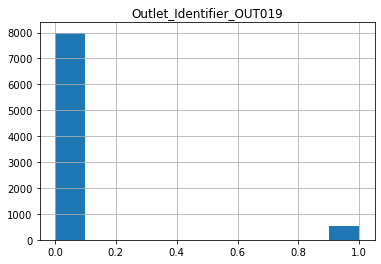

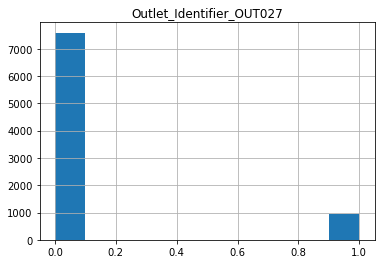

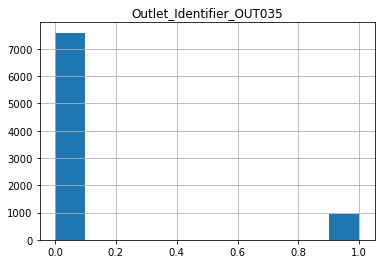

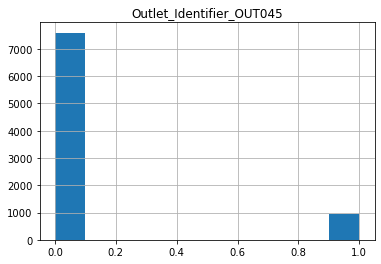

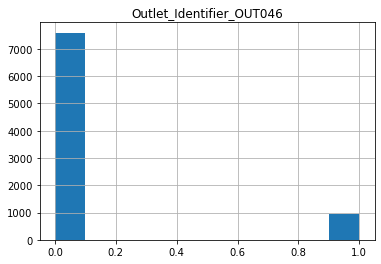

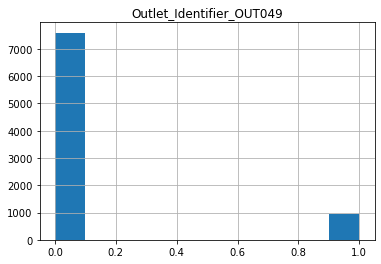

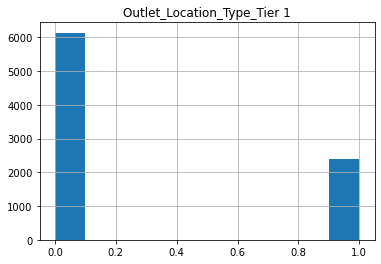

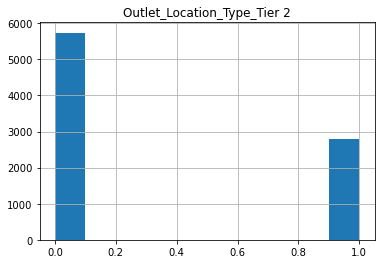

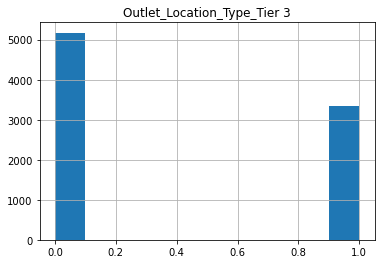

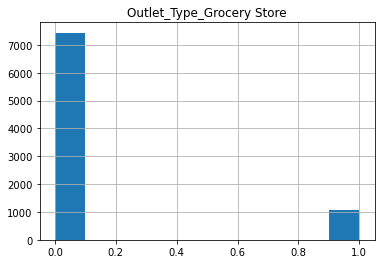

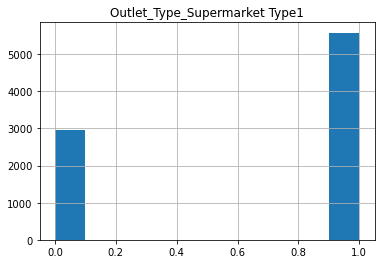

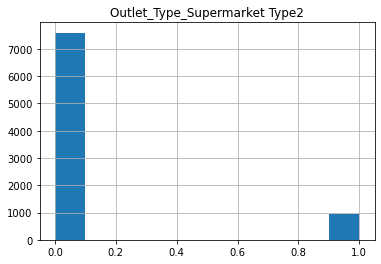

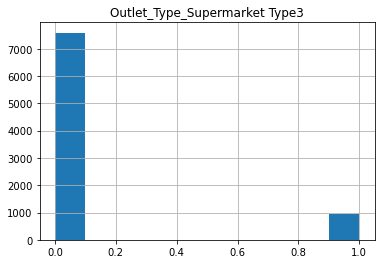

In [287]:
for col in train_df.columns:
    train_df[col].hist()
    plt.title(col)
    plt.show()

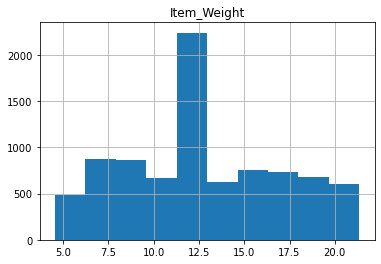

In [288]:
# semi-normal distribution
train_df["Item_Weight"].hist()
plt.title("Item_Weight")
plt.show()

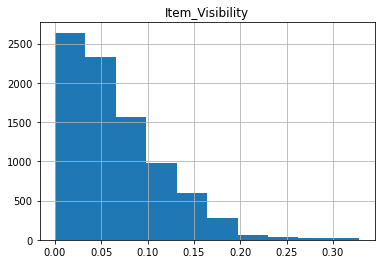

In [289]:
# semi-exponential distribution
train_df["Item_Visibility"].hist()
plt.title("Item_Visibility")
plt.show()

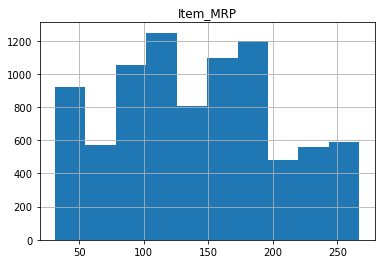

In [290]:
# semi-uniform distribution
train_df["Item_MRP"].hist()
plt.title("Item_MRP")
plt.show()

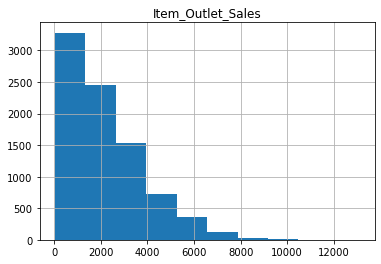

In [291]:
# semi-exponential distribution
train_df["Item_Outlet_Sales"].hist()
plt.title("Item_Outlet_Sales")
plt.show()

## 1-د

Text(0.5, 0, 'Feature Importance')

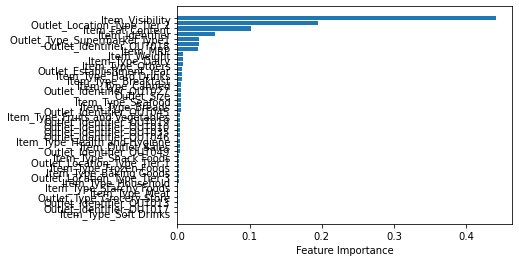

In [292]:
rf = RandomForestRegressor(n_estimators = 150)
cor_X = train_df.loc[:, (train_df.columns != 'Item_Identifier') & (train_df.columns != 'Item_Outlet_Sales')]
cor_y = train_df["Item_Outlet_Sales"]
rf.fit(cor_X, cor_y)

sort = rf.feature_importances_.argsort()
plt.barh(train_df.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")



## 1-و

In [293]:
X = train_df.loc[:, (train_df.columns != 'Item_Identifier') & (train_df.columns != 'Item_Outlet_Sales')]
y = train_df["Item_Outlet_Sales"]


##### normalizing data
X = (X - X.min()) / (X.max() - X.min())



X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_A, X_val_A, y_train_A, y_val_A = train_test_split(X_train_A, y_train_A, test_size = 1/9, random_state = 42)

X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_B, X_val_B, y_train_B, y_val_B = train_test_split(X_train_B, y_train_B, test_size = 0.25, random_state = 42)

In [294]:
# k-fold


## 1-ه

[[ 3.65991628e+02]
 [ 1.86673310e+01]
 [ 2.37882700e+01]
 [-1.10982252e+02]
 [ 2.76627074e+03]
 [ 2.37467504e+00]
 [ 1.19629173e+02]
 [-2.44701984e+01]
 [ 2.13181755e+01]
 [ 3.10193557e+01]
 [ 5.16702276e+01]
 [-1.30109142e+01]
 [ 2.02293160e+01]
 [ 8.40521174e+01]
 [ 9.95288585e+00]
 [-2.50062985e+01]
 [ 7.09757995e+01]
 [ 4.46620433e+01]
 [-2.05672370e+01]
 [ 3.12029749e+01]
 [ 6.91747136e+01]
 [-7.05228214e+00]
 [ 2.18409485e+01]
 [-6.02726073e+02]
 [-1.01268682e+02]
 [ 2.90603370e+01]
 [ 1.96835488e+01]
 [-3.34165538e+02]
 [ 8.85436447e+02]
 [ 1.90268990e+02]
 [-6.96629820e+01]
 [ 1.69361148e+02]
 [ 1.80004432e+02]
 [ 1.52000418e+01]
 [ 1.49666345e+02]
 [ 2.01125241e+02]
 [-9.36891611e+02]
 [ 3.97763242e+02]
 [ 1.96835488e+01]
 [ 8.85436447e+02]]


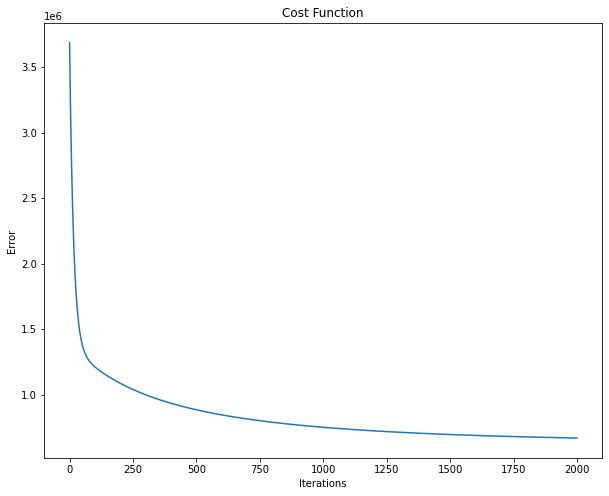

In [295]:
def costFunctionMSE(X, y, theta):
    m = len(y)
    result = (1 / (2 * m)) * np.sum((np.matmul(X, theta) - y) ** 2)
    return result
def costFunctionMAE(X, y, theta):
    m = len(y)
    result = (1 / (2 * m)) * np.sum(np.abs((np.matmul(X, theta) - y)))
    return result

def BGD(X, y, theta, learning_rate = 0.01, num_epochs = 50):
    m = len(y)
    new_theta = theta.copy()
    cost_history = np.zeros(num_epochs)
    for i in range(num_epochs):
        new_theta = new_theta - (learning_rate / m) * np.matmul(np.transpose(X), (np.matmul(X, new_theta) - y))
        cost_history[i] = costFunctionMSE(X, y, new_theta)
    return new_theta, cost_history


# convert to numpy
X = X_train_A.to_numpy()
y = y_train_A.to_numpy()

# add a column with ones for the bias value while converting it into a matrix
X = np.column_stack(([1] * X.shape[0], X))

# rows and columns
m, n = X.shape

# initial theta
theta = np.zeros(shape = (n, 1))

# run batch gradient descent
b_new_theta, b_cost_history = BGD(X, y.reshape((len(y), 1)), theta, 0.01, 2000)
print(b_new_theta)

# plot costs
plt.figure(figsize = (10, 8))
plt.plot(b_cost_history)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
None

## 1-ی

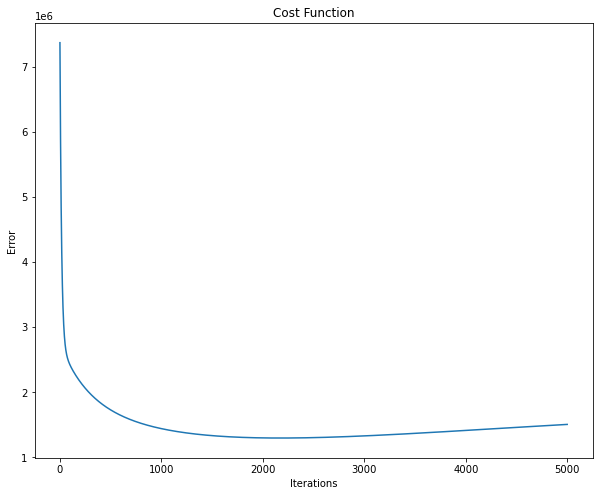

In [296]:
def costFunctionRidge(X, y, theta, lmbd):
    m = len(y)
    result = (1 / m) * (np.sum((np.matmul(X, theta) - y) ** 2) + lmbd * np.dot(theta.T, theta))
    return result

def RidgeBGD(X, y, theta, learning_rate = 0.01, lmbd = 1, num_epochs = 50):
    m = len(y)
    new_theta = theta.copy()
    cost_history = np.zeros(num_epochs)
    for i in range(num_epochs):
        new_theta = new_theta - (learning_rate / m) * np.matmul(np.transpose(X), (np.matmul(X, new_theta) - y)) + (2 / m) * lmbd * new_theta
        cost_history[i] = costFunctionRidge(X, y, new_theta, lmbd)
    return new_theta, cost_history

# convert to numpy
X = X_train_A.to_numpy()
y = y_train_A.to_numpy()

# add a column with ones for the bias value while converting it into a matrix
X = np.column_stack(([1] * X.shape[0], X))

# rows and columns
m, n = X.shape

# initial theta
theta = np.zeros(shape = (n, 1))

# run batch gradient descent
r_b_new_theta, r_b_cost_history = RidgeBGD(X, y.reshape((len(y), 1)), theta, 0.01, 1, 5000)

# plot costs
plt.figure(figsize = (10, 8))
plt.plot(r_b_cost_history)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
None

## 1-ک

### How lasso does feature selection?
The LASSO method regularizes model parameters by shrinking the regression coefficients, reducing some of them to zero. The feature selection phase occurs after the shrinkage, where every non-zero value is selected to be used in the model.

### 1-ک-الف

[[ 3.65991628e+02]
 [ 1.86673310e+01]
 [ 2.37882700e+01]
 [-1.10982252e+02]
 [ 2.76627074e+03]
 [ 2.37467504e+00]
 [ 1.19629173e+02]
 [-2.44701984e+01]
 [ 2.13181755e+01]
 [ 3.10193557e+01]
 [ 5.16702276e+01]
 [-1.30109142e+01]
 [ 2.02293160e+01]
 [ 8.40521174e+01]
 [ 9.95288585e+00]
 [-2.50062985e+01]
 [ 7.09757995e+01]
 [ 4.46620433e+01]
 [-2.05672370e+01]
 [ 3.12029749e+01]
 [ 6.91747136e+01]
 [-7.05228214e+00]
 [ 2.18409485e+01]
 [-6.02726073e+02]
 [-1.01268682e+02]
 [ 2.90603370e+01]
 [ 1.96835488e+01]
 [-3.34165538e+02]
 [ 8.85436447e+02]
 [ 1.90268990e+02]
 [-6.96629820e+01]
 [ 1.69361148e+02]
 [ 1.80004432e+02]
 [ 1.52000418e+01]
 [ 1.49666345e+02]
 [ 2.01125241e+02]
 [-9.36891611e+02]
 [ 3.97763242e+02]
 [ 1.96835488e+01]
 [ 8.85436447e+02]]


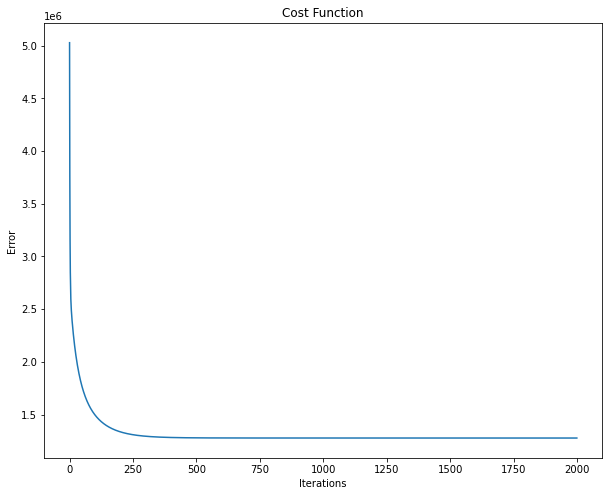

In [297]:
def costFunctionLasso(X, y, theta, lmbd):
    m = len(y)
    result = (1 / m) * (np.sum((np.matmul(X, theta) - y) ** 2) + lmbd * np.sum(np.abs(theta)))
    return result

def LassoBGD(X, y, theta, learning_rate = 0.01, lmbd = 1, num_epochs = 50):
    m = len(y)
    new_theta = theta.copy()
    cost_history = np.zeros(num_epochs)
    for i in range(num_epochs):
        new_theta = new_theta - (learning_rate / m) * np.matmul(np.transpose(X), (np.matmul(X, new_theta) - y)) + (1 / m) * (lmbd * np.sign(new_theta))
        cost_history[i] = costFunctionLasso(X, y, new_theta, lmbd)
    return new_theta, cost_history

# convert to numpy
X = X_train_A.to_numpy()
y = y_train_A.to_numpy()

# add a column with ones for the bias value while converting it into a matrix
X = np.column_stack(([1] * X.shape[0], X))

# rows and columns
m, n = X.shape

# initial theta
theta = np.zeros(shape = (n, 1))

# run batch gradient descent
l_b_new_theta, l_b_cost_history = LassoBGD(X, y.reshape((len(y), 1)), theta, 0.1, 1, 2000)
print(b_new_theta)

# plot costs
plt.figure(figsize = (10, 8))
plt.plot(l_b_cost_history)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
None

### 1-ک-ب

[[ 3.65991628e+02]
 [ 1.86673310e+01]
 [ 2.37882700e+01]
 [-1.10982252e+02]
 [ 2.76627074e+03]
 [ 2.37467504e+00]
 [ 1.19629173e+02]
 [-2.44701984e+01]
 [ 2.13181755e+01]
 [ 3.10193557e+01]
 [ 5.16702276e+01]
 [-1.30109142e+01]
 [ 2.02293160e+01]
 [ 8.40521174e+01]
 [ 9.95288585e+00]
 [-2.50062985e+01]
 [ 7.09757995e+01]
 [ 4.46620433e+01]
 [-2.05672370e+01]
 [ 3.12029749e+01]
 [ 6.91747136e+01]
 [-7.05228214e+00]
 [ 2.18409485e+01]
 [-6.02726073e+02]
 [-1.01268682e+02]
 [ 2.90603370e+01]
 [ 1.96835488e+01]
 [-3.34165538e+02]
 [ 8.85436447e+02]
 [ 1.90268990e+02]
 [-6.96629820e+01]
 [ 1.69361148e+02]
 [ 1.80004432e+02]
 [ 1.52000418e+01]
 [ 1.49666345e+02]
 [ 2.01125241e+02]
 [-9.36891611e+02]
 [ 3.97763242e+02]
 [ 1.96835488e+01]
 [ 8.85436447e+02]]


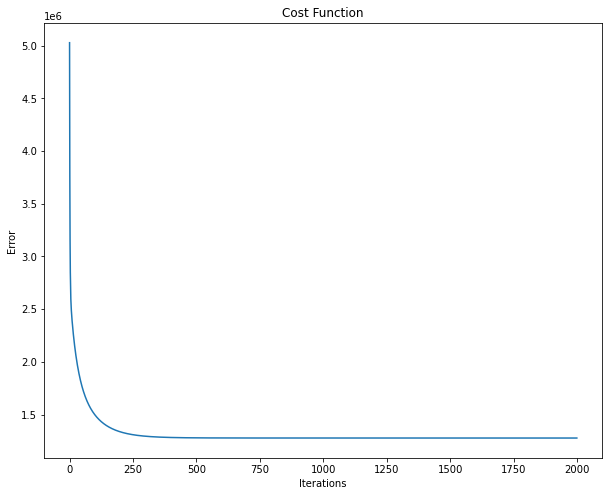

In [298]:
# convert to numpy
X = X_train_A.to_numpy()
y = y_train_A.to_numpy()

# add a column with ones for the bias value while converting it into a matrix
X = np.column_stack(([1] * X.shape[0], X))

# rows and columns
m, n = X.shape

# initial theta
theta = np.zeros(shape = (n, 1))

# run batch gradient descent
l_b_new_theta, l_b_cost_history = LassoBGD(X, y.reshape((len(y), 1)), theta, 0.1, 1, 2000)
print(b_new_theta)

# plot costs
plt.figure(figsize = (10, 8))
plt.plot(l_b_cost_history)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
None

## 1-گ

In [299]:
# convert to numpy
X = X_train_A.to_numpy()
y = y_train_A.to_numpy()

# add a column with ones for the bias value while converting it into a matrix
X = np.column_stack(([1] * X.shape[0], X))

# rows and columns
m, n = X.shape

# initial theta
theta = np.zeros(shape = (n, 1))

# run batch gradient descent
r_b_new_theta, r_b_cost_history = RidgeBGD(X, y.reshape((len(y), 1)), theta, 0.1, 1, 2000)
l_b_new_theta, l_b_cost_history = LassoBGD(X, y.reshape((len(y), 1)), theta, 0.1, 1, 2000)
r_b_new_theta = np.squeeze(r_b_new_theta)
l_b_new_theta = np.squeeze(l_b_new_theta)

In [300]:
# convert to numpy
X = X_test_A.to_numpy()
y = y_test_A.to_numpy()

# add a column with ones for the bias value while converting it into a matrix
X = np.column_stack(([1] * X.shape[0], X))

### MSE

In [301]:
print(costFunctionMSE(X, y_test_A, r_b_new_theta))
print(costFunctionMSE(X, y_test_A, l_b_new_theta))

597163.6528778139
593509.862304309


### MAE

In [302]:
print(costFunctionMAE(X, y_test_A, r_b_new_theta))
print(costFunctionMAE(X, y_test_A, l_b_new_theta))

407.1611892565774
404.3567338302315


$Error_{MAE} \lt Error_{MSE}$

## 1-ل

In [303]:
# convert to numpy
X = X_train_A.to_numpy()
y = y_train_A.to_numpy()

# add a column with ones for the bias value while converting it into a matrix
X = np.column_stack(([1] * X.shape[0], X))

# rows and columns
m, n = X.shape

# initial theta
theta = np.zeros(shape = (n, 1))

In [304]:
r_cost1 = np.zeros(100)
l_cost1 = np.zeros(100)

for i in range(1, 100):
    # convert to numpy
    X = X_train_A.to_numpy()
    y = y_train_A.to_numpy()
    # add a column with ones for the bias value while converting it into a matrix
    X = np.column_stack(([1] * X.shape[0], X))
    # rows and columns
    m, n = X.shape
    # initial theta
    theta = np.zeros(shape = (n, 1))
    
    
    r_b_new_theta, r_b_cost_history = RidgeBGD(X, y.reshape((len(y), 1)), theta, i/1000, 1, 2000)
    l_b_new_theta, l_b_cost_history = LassoBGD(X, y.reshape((len(y), 1)), theta, i/1000, 1, 2000)
    r_b_new_theta = np.squeeze(r_b_new_theta)
    l_b_new_theta = np.squeeze(l_b_new_theta)
    
    # convert to numpy
    X = X_test_A.to_numpy()
    y = y_test_A.to_numpy()
    # add a column with ones for the bias value while converting it into a matrix
    X = np.column_stack(([1] * X.shape[0], X))
    
    r_cost1[i] = costFunctionMSE(X, y_test_A, r_b_new_theta)
    l_cost1[i] = costFunctionMSE(X, y_test_A, l_b_new_theta)
    


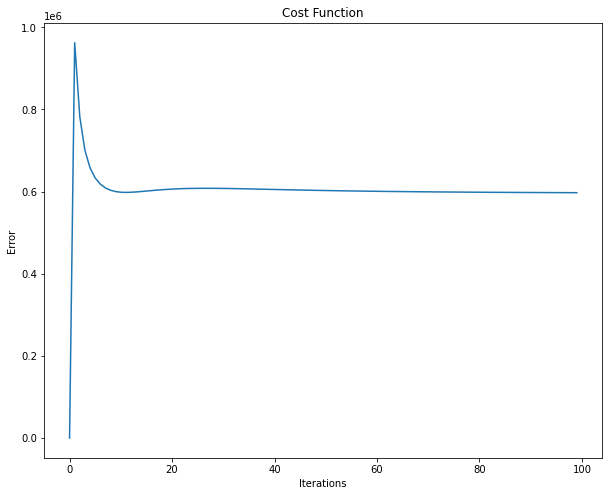

In [305]:
# plot costs
plt.figure(figsize = (10, 8))
plt.plot(r_cost1)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
None

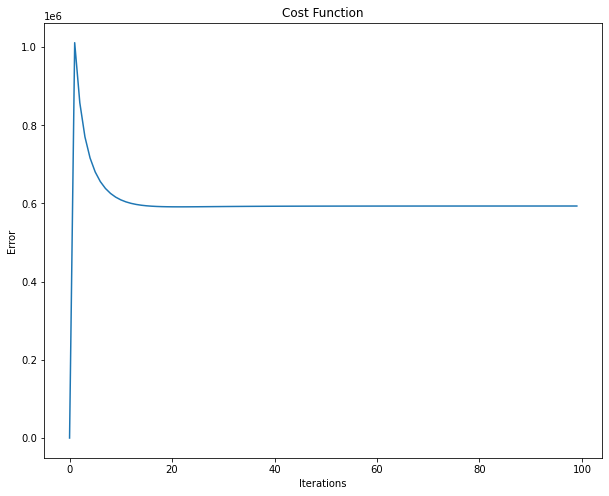

In [306]:
# plot costs
plt.figure(figsize = (10, 8))
plt.plot(l_cost1)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
None

In [307]:
# convert to numpy
X = X_train_A.to_numpy()
y = y_train_A.to_numpy()

# add a column with ones for the bias value while converting it into a matrix
X = np.column_stack(([1] * X.shape[0], X))

# rows and columns
m, n = X.shape

# initial theta
theta = np.zeros(shape = (n, 1))

In [308]:
r_cost2 = np.zeros(100)
l_cost2 = np.zeros(100)

for i in range(1, 100):
    # convert to numpy
    X = X_train_A.to_numpy()
    y = y_train_A.to_numpy()
    # add a column with ones for the bias value while converting it into a matrix
    X = np.column_stack(([1] * X.shape[0], X))
    # rows and columns
    m, n = X.shape
    # initial theta
    theta = np.zeros(shape = (n, 1))
    
    
    r_b_new_theta, r_b_cost_history = RidgeBGD(X, y.reshape((len(y), 1)), theta, 0.5, i / 1000, 2000)
    l_b_new_theta, l_b_cost_history = LassoBGD(X, y.reshape((len(y), 1)), theta, 0.5, i / 1000, 2000)
    r_b_new_theta = np.squeeze(r_b_new_theta)
    l_b_new_theta = np.squeeze(l_b_new_theta)
    
    # convert to numpy
    X = X_test_A.to_numpy()
    y = y_test_A.to_numpy()
    # add a column with ones for the bias value while converting it into a matrix
    X = np.column_stack(([1] * X.shape[0], X))
    
    r_cost2[i] = costFunctionMSE(X, y_test_A, r_b_new_theta)
    l_cost2[i] = costFunctionMSE(X, y_test_A, l_b_new_theta)
    


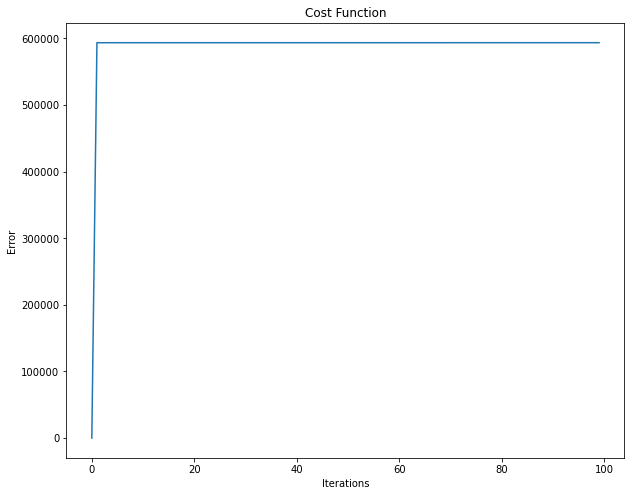

In [309]:
# plot costs
plt.figure(figsize = (10, 8))
plt.plot(r_cost2)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
None

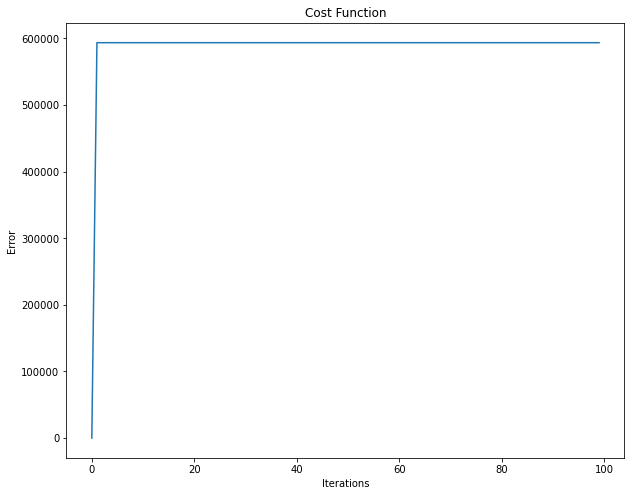

In [310]:
# plot costs
plt.figure(figsize = (10, 8))
plt.plot(l_cost2)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
None

<p></p>
<br />
<div id="1st" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
تاثیر ضریب پنالتی بر overfitو underfit
        </font>
		<p></p>
		<hr>
با افزایش کقدار ضریب پنالتی مدل به سمت underfit شدن می‌رود. چون هزینه استفاده از هر یک از ویژگی‌ها زیاد شده است، حذف آن ویژگی (ضریب 0) باعث underfit شدن مدل می‌شود. همچنین با کاهش ضریب پنالتی مدل به سمت overfit شدن می‌رود. چون هزینه استفاده از هر ویژگی کم شده است، استفاده از آن ویژگی باعث کاهش تابع هزینه می‌شود و به این ترتیب مدل overfit می‌شود.
        <br/>
        <br/><br/>
	</font>
</div>

## 1-م

In [311]:
X_train_A["Item_MRP_2"] = X_train_A["Item_MRP"] ** 2
X_train_A["Outlet_Establishment_Year_2"] = X_train_A["Outlet_Establishment_Year"] ** 2

X_test_A["Item_MRP_2"] = X_train_A["Item_MRP"] ** 2
X_test_A["Outlet_Establishment_Year_2"] = X_train_A["Outlet_Establishment_Year"] ** 2



# convert to numpy
X = X_train_A.to_numpy()
y = y_train_A.to_numpy()

# add a column with ones for the bias value while converting it into a matrix
X = np.column_stack(([1] * X.shape[0], X))

# rows and columns
m, n = X.shape

# initial theta
theta = np.zeros(shape = (n, 1))

In [312]:
r_cost1 = np.zeros(100)
l_cost1 = np.zeros(100)
r_cost11 = np.zeros(100)
l_cost11 = np.zeros(100)

for i in range(1, 100):
    # convert to numpy
    X = X_train_A.to_numpy()
    y = y_train_A.to_numpy()
    # add a column with ones for the bias value while converting it into a matrix
    X = np.column_stack(([1] * X.shape[0], X))
    # rows and columns
    m, n = X.shape
    # initial theta
    theta = np.zeros(shape = (n, 1))
    
    
    r_b_new_theta, r_b_cost_history = RidgeBGD(X, y.reshape((len(y), 1)), theta, i/1000, 1, 2000)
    l_b_new_theta, l_b_cost_history = LassoBGD(X, y.reshape((len(y), 1)), theta, i/1000, 1, 2000)
    r_b_new_theta = np.squeeze(r_b_new_theta)
    l_b_new_theta = np.squeeze(l_b_new_theta)
    
    # convert to numpy
    X = X_test_A.to_numpy()
    y = y_test_A.to_numpy()
    # add a column with ones for the bias value while converting it into a matrix
    X = np.column_stack(([1] * X.shape[0], X))
    
    r_cost1[i] = costFunctionMSE(X, y_test_A, r_b_new_theta)
    l_cost1[i] = costFunctionMSE(X, y_test_A, l_b_new_theta)
    r_cost11[i] = costFunctionMAE(X, y_test_A, r_b_new_theta)
    l_cost11[i] = costFunctionMAE(X, y_test_A, l_b_new_theta)
    
    


In [313]:
# convert to numpy
X = X_train_A.to_numpy()
y = y_train_A.to_numpy()

# add a column with ones for the bias value while converting it into a matrix
X = np.column_stack(([1] * X.shape[0], X))

# rows and columns
m, n = X.shape

# initial theta
theta = np.zeros(shape = (n, 1))

In [314]:
r_cost2 = np.zeros(100)
l_cost2 = np.zeros(100)
r_cost22 = np.zeros(100)
l_cost22 = np.zeros(100)

for i in range(1, 100):
    # convert to numpy
    X = X_train_A.to_numpy()
    y = y_train_A.to_numpy()
    # add a column with ones for the bias value while converting it into a matrix
    X = np.column_stack(([1] * X.shape[0], X))
    # rows and columns
    m, n = X.shape
    # initial theta
    theta = np.zeros(shape = (n, 1))
    
    
    r_b_new_theta, r_b_cost_history = RidgeBGD(X, y.reshape((len(y), 1)), theta, 0.5, i / 1000, 2000)
    l_b_new_theta, l_b_cost_history = LassoBGD(X, y.reshape((len(y), 1)), theta, 0.5, i / 1000, 2000)
    r_b_new_theta = np.squeeze(r_b_new_theta)
    l_b_new_theta = np.squeeze(l_b_new_theta)
    
    # convert to numpy
    X = X_test_A.to_numpy()
    y = y_test_A.to_numpy()
    # add a column with ones for the bias value while converting it into a matrix
    X = np.column_stack(([1] * X.shape[0], X))
    
    r_cost2[i] = costFunctionMSE(X, y_test_A, r_b_new_theta)
    l_cost2[i] = costFunctionMSE(X, y_test_A, l_b_new_theta)
    r_cost22[i] = costFunctionMAE(X, y_test_A, r_b_new_theta)
    l_cost22[i] = costFunctionMAE(X, y_test_A, l_b_new_theta)
    


## 1-نمره اضافی

In [315]:
test_df = pd.read_csv('Q1_data/BigMart_Dataset_Testset.csv')
##### cleaning data
#handling missing values and wrong values
test_df["Item_Weight"] = test_df["Item_Weight"].replace(np.NaN, test_df["Item_Weight"].mean())

test_df["Item_Fat_Content"] = test_df["Item_Fat_Content"].replace("LF", "Low Fat")
test_df["Item_Fat_Content"] = test_df["Item_Fat_Content"].replace("low fat", "Low Fat")
test_df["Item_Fat_Content"] = test_df["Item_Fat_Content"].replace("reg", "Regular")
test_df["Item_Fat_Content"] = test_df["Item_Fat_Content"].replace({"Low Fat" : 1, "Regular" : 2})

test_df["Outlet_Size"] = test_df["Outlet_Size"].replace({"Small" : 1, "Medium" : 2, "High" : 3 })
test_df["Outlet_Size"] = test_df["Outlet_Size"].replace(np.NaN, np.round(test_df["Outlet_Size"].mean()))

test_df = pd.get_dummies(test_df, columns = ["Item_Type", "Outlet_Identifier", "Outlet_Location_Type", "Outlet_Type"])

X = test_df.loc[:, (test_df.columns != 'Item_Identifier') & (test_df.columns != 'Item_Outlet_Sales')]
X = np.column_stack(([1] * X.shape[0], X))
##### normalizing data
X = (X - X.min()) / (X.max() - X.min())

test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDW58,20.750000,1,0.007565,107.8622,1999,2.0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,FDW14,8.300000,2,0.038428,87.3198,2007,2.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,NCN55,14.600000,1,0.099575,241.7538,1998,2.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,FDQ58,7.315000,1,0.015388,155.0340,2007,2.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,FDY38,12.695633,2,0.118599,234.2300,1985,2.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [316]:
def costFunctionMSE(X, y, theta):
    m = len(y)
    result = (1 / (2 * m)) * np.sum((np.matmul(X, theta) - y) ** 2)
    return result
def costFunctionMAE(X, y, theta):
    m = len(y)
    result = (1 / (2 * m)) * np.sum(np.abs((np.matmul(X, theta) - y)))
    return result

def BGD(X, y, theta, learning_rate = 0.01, num_epochs = 50):
    m = len(y)
    new_theta = theta.copy()
    cost_history = np.zeros(num_epochs)
    for i in range(num_epochs):
        new_theta = new_theta - (learning_rate / m) * np.matmul(np.transpose(X), (np.matmul(X, new_theta) - y))
        cost_history[i] = costFunctionMSE(X, y, new_theta)
    return new_theta, cost_history


# convert to numpy
X = X_train_A.to_numpy()
y = y_train_A.to_numpy()

# add a column with ones for the bias value while converting it into a matrix
X = np.column_stack(([1] * X.shape[0], X))

# rows and columns
m, n = X.shape

# initial theta
theta = np.zeros(shape = (n, 1))

# run batch gradient descent
b_new_theta, b_cost_history = BGD(X, y.reshape((len(y), 1)), theta, 0.01, 2000)

In [318]:
answer_to_tests = np.dot(X, b_new_theta)

In [319]:
print(answer_to_tests)

[[1304.66597876]
 [3574.51821116]
 [2097.98117876]
 ...
 [ 982.19329439]
 [1870.65248695]
 [4381.03486475]]


In [322]:
np.savetxt("foo.csv", answer_to_tests, delimiter=",")

In [323]:
##########################################################################################################

# 2

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [325]:
data = pd.read_csv('Q2_data/data.csv')
data

,x,y
0,-10.0,1.2
1,-9.0,4.2
2,-8.0,6.7
3,-7.0,8.3
4,-6.0,10.6
5,-5.0,11.7
6,-4.0,13.5
7,-3.0,14.5
8,-2.0,15.7
9,-1.0,16.1


## 2-الف

In [326]:
data_array = data.to_numpy()

In [327]:
print(data_array[:, 0])
print(data_array[:, 1])

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
[ 1.2  4.2  6.7  8.3 10.6 11.7 13.5 14.5 15.7 16.1 16.6 16.  15.4 14.4
 14.2 12.7 10.3  8.6  6.1  3.9  2.1]


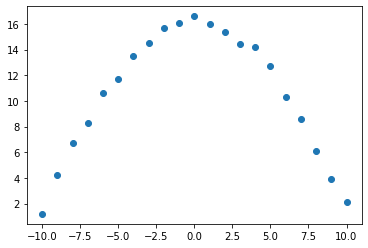

In [328]:
plt.scatter(data_array[:, 0], data_array[:, 1])

## 2-ب

In [329]:
def getGaussianDist(X, a, mu, sigma):
    result = a * np.exp(-0.5 * ((X - mu) / (sigma)) ** 2)
    return result

## 2-ج

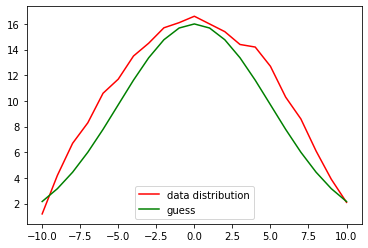

In [330]:
X = data_array[:, 0]
y = data_array[:, 1]

# a, mu, and sigma guess values
a_init = 16
mu_init = 0
sigma_init = 5

y_pred = getGaussianDist(X, a_init, mu_init, sigma_init)

plt.plot(X, y, color = 'r', label = 'data distribution')
plt.plot(X, y_pred, color = 'g', label = 'guess')
plt.legend()

In [331]:
def getMSE(y1, y2):
    result = np.mean((y1 - y2) ** 2)
    return result

In [332]:
print(getMSE(y, y_pred))

3.0464847120981164


<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
به ازای مقادیر $a$، $\mu$ و $\sigma$ به ترتیب 16، 0 و 5 خطای به دست آمده تقریبا 3/05 است.</li>
<br/>
	</font>
</div>

## 2-د

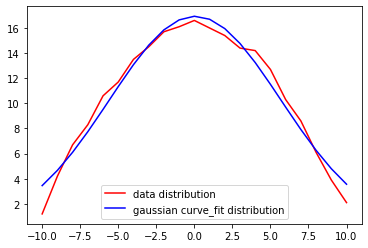

In [333]:
# using curve_fit function in scipy to calculate parameters of gaussian function
gaussian_fitted_param, gaussian_fitted_param_cov = curve_fit(getGaussianDist, X, y)

gaussian_fitted_y_pred = getGaussianDist(X, gaussian_fitted_param[0], gaussian_fitted_param[1], gaussian_fitted_param[2])

plt.plot(X, y, color = 'r', label = 'data distribution')
#plt.plot(X, y_pred, color = 'g', label = 'guess distribution')
plt.plot(X, gaussian_fitted_y_pred, color = 'b', label = 'gaussian curve_fit distribution')
plt.legend()

In [334]:
print(getMSE(y, gaussian_fitted_y_pred))

0.7105533649796423


<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
خطای پیشبینی در این حالت تقریبا 0/71 است.</li>
<br/>
	</font>
</div>

## 2-ه

In [335]:
def getCos(X, a, b):
    result = a * np.cos(b * X)
    return result

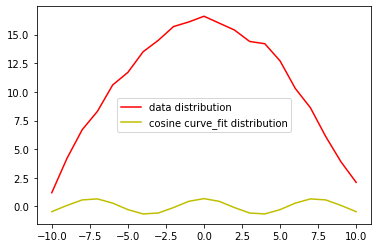

In [336]:
# using curve_fit function in scipy to calculate parameters of gaussian function
cosine_fitted_param, cosine_fitted_param_cov = curve_fit(getCos, X, y)

cosine_fitted_y_pred = getCos(X, cosine_fitted_param[0], cosine_fitted_param[1])

plt.plot(X, y, color = 'r', label = 'data distribution')
#plt.plot(X, y_pred, color = 'g', label = 'guess distribution')
#plt.plot(X, gaussian_fitted_y_pred, color = 'b', label = 'gaussian curve_fit distribution')
plt.plot(X, cosine_fitted_y_pred, color = 'y', label = 'cosine curve_fit distribution')

plt.legend()

In [337]:
print(getMSE(y, cosine_fitted_y_pred))

135.78758804144437


## 2-و

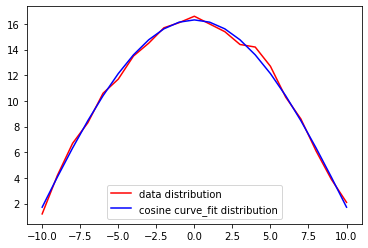

In [338]:
# a and b guess values
a_init = 16.93507011
b_init = np.pi / 20

# using curve_fit function in scipy to calculate parameters of cosine function given the initial guesses for parameters
guess_cosine_fitted_param, guess_cosine_fitted_param_cov = curve_fit(getCos, X, y, np.array([a_init, b_init]))

guess_cosine_fitted_y_pred = getCos(X, guess_cosine_fitted_param[0], guess_cosine_fitted_param[1])

plt.plot(X, y, color = 'r', label = 'data distribution')
#plt.plot(X, y_pred, color = 'g', label = 'guess distribution')
#plt.plot(X, gaussian_fitted_y_pred, color = 'b', label = 'gaussian curve_fit distribution')
plt.plot(X, guess_cosine_fitted_y_pred, color = 'b', label = 'cosine curve_fit distribution')

plt.legend()

In [339]:
print(getMSE(y, guess_cosine_fitted_y_pred))

0.09479772192520171


<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
خطای پیشبینی در این حالت تقریبا 0/09 است.</li>
<br/>
	</font>
</div>